In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim, flatten
from torch.nn import Linear, Conv2d, MaxPool2d, BatchNorm2d, Module, Dropout, ReLU
import torch.nn.functional as F
torch.manual_seed(0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("available core is", device)

available core is cuda


In [2]:
class Network1(nn.Module):
    def __init__(self):
        super(Network1, self).__init__()
        self.fc1 = nn.Linear(1,5)
        self.fc2 = nn.Linear(5,10)
        self.fc3 = nn.Linear(10,10)
        self.fc4 = nn.Linear(10,10)
        self.fc5 = nn.Linear(10,10)
        self.fc6 = nn.Linear(10,10)
        self.fc7 = nn.Linear(10,5)
        self.fc8 = nn.Linear(5,1)
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        x = F.leaky_relu(self.fc4(x))
        x = F.leaky_relu(self.fc5(x))
        x = F.leaky_relu(self.fc6(x))
        x = F.leaky_relu(self.fc7(x))
        x = self.fc8(x)      
        return x
    
class Network2(nn.Module):
    def __init__(self):
        super(Network2, self).__init__()
        self.fc1 = nn.Linear(1,10)
        self.fc2 = nn.Linear(10,18)
        self.fc3 = nn.Linear(18,15)
        self.fc4 = nn.Linear(15,4)
        self.fc5 = nn.Linear(4,1)
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        x = F.leaky_relu(self.fc4(x))
        x = self.fc5(x)       
        return x
    
class Network3(nn.Module):
    def __init__(self):
        super(Network3, self).__init__()
        self.fc1 = nn.Linear(1,190)
        self.fc2 = nn.Linear(190,1)
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = self.fc2(x)        
        return x

In [3]:
x = torch.linspace(0.01,1,400)
x=x[:,None]
y = np.sin(5 * 3.142 * x)/(5 * 3.142 * x)

In [4]:
loss_fn = torch.nn.MSELoss()
epochs =20000

print("\n==================={Model 1}===================")
m1_loss =[]
model1 = Network1()
m1_params = sum(p.numel() for p in model1.parameters())
print(f'Number of Parameters in Model 1 is: {m1_params}\n')
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)
for i in range(epochs):
    optimizer1.zero_grad()
    output = model1.forward(x)
    loss = loss_fn(output, y)
    loss=loss.float()
    loss.backward()
    optimizer1.step()
    m1_loss.append(loss.item())
    if i % 3000 == 0:
        print(f'Epoch {i}/{epochs}....Training Loss {loss.item():.8f}')
#print(output.shape)
        
print("\n==================={Model 2}===================")   
model2 = Network2()
m2_params = sum(p.numel() for p in model2.parameters())
print(f'Number of Parameters in Model 2 is: {m2_params}\n')
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001, weight_decay=1e-4)
m2_loss =[]
for i in range(epochs):
    optimizer2.zero_grad()
    output2 = model2.forward(x)
    loss2 = loss_fn(output2, y)
    loss2=loss2.float()
    loss2.backward()
    optimizer2.step()
    m2_loss.append(loss2.item())
    if i % 3000 == 0:
        print(f'Epoch {i}/{epochs}....Training Loss {loss2.item():.8f}')
        
        
print("\n==================={Model 3}===================") 
model3 = Network3()
m3_params = sum(p.numel() for p in model3.parameters())
print(f'Number of Parameters in Model 3 is: {m3_params}\n')
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.001, weight_decay=1e-4)
m3_loss =[]
for i in range(epochs):
    optimizer3.zero_grad()
    output3 = model3.forward(x)
    loss3 = loss_fn(output3, y)
    #output_3.append(output3.detach().numpy())
    loss3=loss3.float()
    loss3.backward()
    optimizer3.step()
    m3_loss.append(loss3.item())
    if i % 3000 == 0:
        print(f'Epoch {i}/{epochs}....Training Loss {loss3.item():.8f}')
    


==================={Model 1}===================
Number of Parameters in Model 1 is: 571

Epoch 0/20000....Training Loss 0.20216703
Epoch 3000/20000....Training Loss 0.00000568
Epoch 6000/20000....Training Loss 0.00000567
Epoch 9000/20000....Training Loss 0.00000174
Epoch 12000/20000....Training Loss 0.00000202
Epoch 15000/20000....Training Loss 0.00000137
Epoch 18000/20000....Training Loss 0.00000128

==================={Model 2}===================
Number of Parameters in Model 2 is: 572

Epoch 0/20000....Training Loss 0.21562347
Epoch 3000/20000....Training Loss 0.00257952
Epoch 6000/20000....Training Loss 0.00255765
Epoch 9000/20000....Training Loss 0.00041696
Epoch 12000/20000....Training Loss 0.00041755
Epoch 15000/20000....Training Loss 0.00041753
Epoch 18000/20000....Training Loss 0.00007769

==================={Model 3}===================
Number of Parameters in Model 3 is: 571

Epoch 0/20000....Training Loss 0.11184702
Epoch 3000/20000....Training Loss 0.00043263
Epoch 6000/20

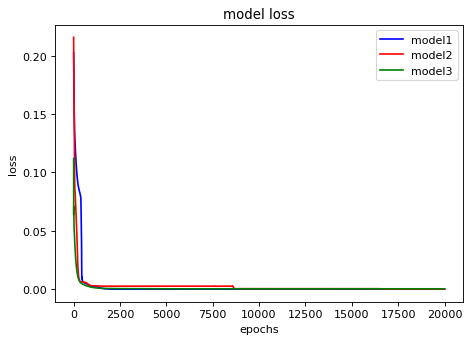

In [5]:
fig = plt.figure(figsize=(6, 8), dpi=80)
plt.subplot(2,1,2)
plt.plot(np.arange(0,epochs), m1_loss, "b")
plt.plot(np.arange(0,epochs), m2_loss, "r")
plt.plot(np.arange(0,epochs), m3_loss, "g")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['model1', 'model2', 'model3'])
plt.tight_layout()
#fig.savefig('func1loss.png')

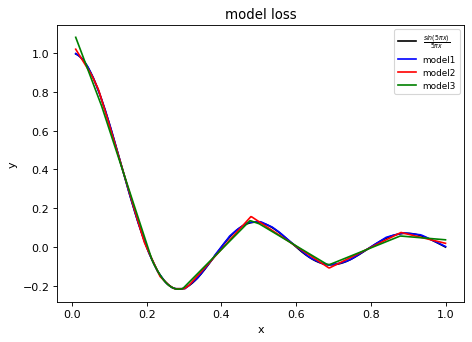

In [7]:
fig = plt.figure(figsize=(6, 8), dpi=80)
plt.subplot(2,1,2)
plt.plot(x, y, "black")
plt.plot(x, output.detach().numpy(), "b")
plt.plot(x, output2.detach().numpy(), "r")
plt.plot(x, output3.detach().numpy(), "g")
plt.title('model loss')
plt.ylabel('y')
plt.xlabel('x')
plt.legend([r'$\frac{sin(5{\pi}{x})}{5{\pi}{x}}$', 'model1', 'model2', 'model3'], prop={'size': 8})
plt.tight_layout()
#fig.savefig('func1plot.png')

# Another Function

In [16]:
x_input = torch.linspace(-1,1,200)
x_input = x_input[:,None]
y_output = np.sign(np.sin(5 * np.pi * x_input))

In [17]:
loss_fn = torch.nn.MSELoss()
epochb =20000

print("\n==================={Model 1}===================")
m1_lossb =[]
model1 = Network1()
m1_params = sum(p.numel() for p in model1.parameters())
print(f'Number of Parameters in Model 1 is: {m1_params}\n')
#optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.0001)
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.0001)
for i in range(epochb):
    optimizer1.zero_grad()
    output1b = model1.forward(x_input)
    loss = loss_fn(output1b, y_output)
    #loss=loss.float()
    loss.backward()
    optimizer1.step()
    m1_lossb.append(loss.item())
    if i % 6000 == 0:
        print(f'Epoch {i}/{epochb}....Training Loss {loss.item():.8f}')
#print(output.shape)
        
print("\n==================={Model 2}===================")   
model2 = Network2()
m2_params = sum(p.numel() for p in model2.parameters())
print(f'Number of Parameters in Model 2 is: {m2_params}\n')
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.0001)
m2_lossb =[]
for i in range(epochb):
    optimizer2.zero_grad()
    output2b = model2.forward(x_input)
    loss2 = loss_fn(output2b, y_output)
    #loss2=loss2.float()
    loss2.backward()
    optimizer2.step()
    m2_lossb.append(loss2.item())
    if i % 6000 == 0:
        print(f'Epoch {i}/{epochb}....Training Loss {loss2.item():.8f}')
        
        
print("\n==================={Model 3}===================") 
model3 = Network3()
m3_params = sum(p.numel() for p in model3.parameters())
print(f'Number of Parameters in Model 3 is: {m3_params}\n')
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.0001)
m3_lossb =[]
for i in range(epochb):
    optimizer3.zero_grad()
    output3b = model3.forward(x_input)
    loss3 = loss_fn(output3b, y_output)
    #output_3.append(output3.detach().numpy())
    ##loss3=loss3.float()
    loss3.backward()
    optimizer3.step()
    m3_lossb.append(loss3.item())
    if i % 6000 == 0:
        print(f'Epoch {i}/{epochb}....Training Loss {loss3.item():.8f}')
    


==================={Model 1}===================
Number of Parameters in Model 1 is: 571

Epoch 0/20000....Training Loss 1.04109406
Epoch 6000/20000....Training Loss 0.07704902
Epoch 12000/20000....Training Loss 0.00162464
Epoch 18000/20000....Training Loss 0.00004561

==================={Model 2}===================
Number of Parameters in Model 2 is: 572

Epoch 0/20000....Training Loss 1.02987516
Epoch 6000/20000....Training Loss 0.29280359
Epoch 12000/20000....Training Loss 0.07969736
Epoch 18000/20000....Training Loss 0.06470387

==================={Model 3}===================
Number of Parameters in Model 3 is: 571

Epoch 0/20000....Training Loss 1.10955203
Epoch 6000/20000....Training Loss 0.75306672
Epoch 12000/20000....Training Loss 0.52950567
Epoch 18000/20000....Training Loss 0.35321143


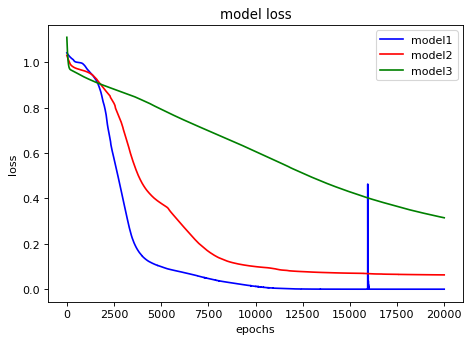

In [18]:
fig = plt.figure(figsize=(6, 8), dpi=80)
plt.subplot(2,1,2)
plt.plot(np.arange(0,epochb), m1_lossb, "b")
plt.plot(np.arange(0,epochb), m2_lossb, "r")
plt.plot(np.arange(0,epochb), m3_lossb, "g")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['model1', 'model2', 'model3'])
plt.tight_layout()
#fig.savefig('func2loss.png')

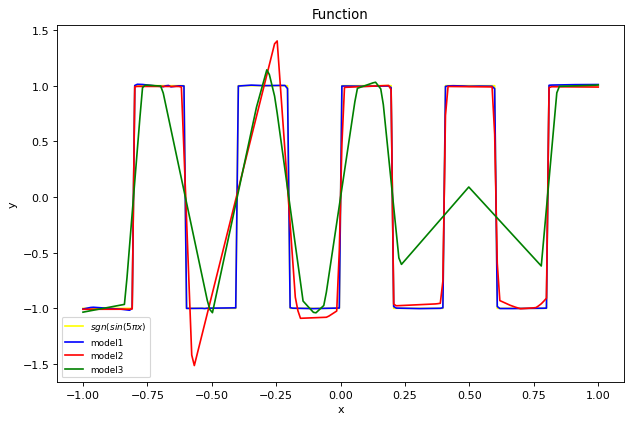

In [19]:
fig = plt.figure(figsize=(8, 10), dpi=80)
plt.subplot(2,1,2)
plt.plot(x_input, y_output, "yellow")
plt.plot(x_input, output1b.detach().numpy(), "b")
plt.plot(x_input, output2b.detach().numpy(), "r")
plt.plot(x_input, output3b.detach().numpy(), "g")
plt.title('Function')
plt.ylabel('y')
plt.xlabel('x')
plt.legend([r'${sgn(sin(5 \pi {x})}$', 'model1', 'model2', 'model3'], prop={'size': 8})
plt.tight_layout()
#fig.savefig('func2plot.png')